# Homogeense elliptilise võrrandiga rajaülesande lahendamine

<font size="5.3">
    
              
 
<font size="4.0">   
On vaja leida funktsioon $u(x,t)$, mis rahuldab võrrandit
    
   \begin{equation}
    \dfrac{\partial^{\,2}u}{\partial x^2}+\dfrac{\partial^{\,2}u}{\partial y^2}=0\,,\;\;0 < x < a\,,\;\;0< y < b\,.
   \end{equation}
    
ja rajatingimusi
    
   \begin{equation}
   u(x,0)=0\,,\;\;u(x,b)=0\,,\;\; 0 < x < a\,,
   \end{equation}
    
   \begin{equation}
    u(0,y)=Ay(b-y)\,,\;\;u(a,y)=0\,,\;\;0< y < b\,.
   \end{equation}

Ülesande lahendamiseks kasutame Laplace'i operaatori Greeni funktsiooni kujul

   \begin{equation}
    G(\xi,\eta;x,y)=\sum\limits_{nm}\dfrac{1}{\Lambda_{nm}}U_{nm}(x,y)\,U_{nm}(\xi,\eta)\,,
   \end{equation}
   
kus $U_{nm}(x,y)$ on Laplace'i operaatori omafunktsioonid ning $\Lambda_{nm}$ on selle operaatori omaväärtused. Lahendi leidmiseks kasutame $u(x,t)$ avaldist Greeni funktsiooni kaudu ning integreerime numbriliselt.

*************************************************
**********PROGRAMM ALUSTAS TÖÖD******************
*************************************************



<IPython.core.display.Javascript object>


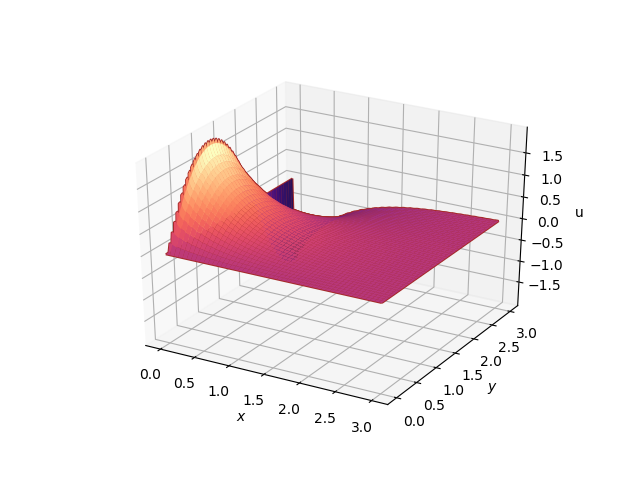

Programmi käivitamisest kuni programmi töö lõpuni kulus 86 sekundit aega.
***********************************************
**********PROGRAMM LÕPETAS TÖÖ*****************
***********************************************


In [2]:
%matplotlib notebook
from matplotlib import cm
from timeit import default_timer as timer
from mpl_toolkits import mplot3d
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt

def too_algus():
    print('*************************************************')
    print('**********PROGRAMM ALUSTAS TÖÖD******************')
    print('*************************************************')
    print('')
    
def too_lopp():
    print('***********************************************')
    print('**********PROGRAMM LÕPETAS TÖÖ*****************')
    print('***********************************************')


pii=np.pi
a=3
b=2
N=150
A=2

def mu10(arg):
    return  A*arg*(b-arg)
def mu1a(arg):
    return 0

def Y(arg,par1):
    m=par1
    return np.sqrt(2/b)*np.sin(m*pii*arg/b)

def X(arg,par2):
    n=par2
    return np.sqrt(2/a)*np.sin(n*pii*arg/a)

def dX(arg,par3):
      n=par3
      return np.sqrt(2/a)*(n*pii/a)*np.cos(n*pii*arg/a)

def mu10Y(eta, par4):
       m=par4
       return mu10(eta)*Y(eta,m)
    
def mu1aY(eta, par5):
       m=par5
       return -mu1a(eta)*Y(eta,m)    
    
def integreeri(fm,param,alumine_raja, ulemine_raja, solmede_arv):
    h = (ulemine_raja-alumine_raja)/ solmede_arv
    argument = np.linspace(alumine_raja+ (h/2), ulemine_raja- (h/2), solmede_arv)
    fun= fm(argument,param)
    pinda = np.sum(fun)* h
    return pinda    
    
SolmedeArv=350

def I0(m):
       return integreeri(mu10Y,m,0, b, SolmedeArv)
    
def Ia(m):
       return integreeri(mu1aY,m,0, b, SolmedeArv)
def Lambdu(n,m):    
        return ((n*pii/a)**2)+((m*pii/b)**2)
    
def u(x,y,liikmeid_summas):
        sum=0
        for i in range(liikmeid_summas-1):
            for j in range(liikmeid_summas-1):
                i=i+1
                j=j+1
                sum=sum+(1/Lambdu(i,j))*X(x,i)*Y(y,j)*((dX(0,i)*I0(j))+(dX(a,i)*Ia(j)))
        return sum
    
algusaeg = timer() 
too_algus()

xv = np.linspace(0, a, N)
yv=np.linspace(0, a, N)
 
xvv, yvv = np.meshgrid(xv, yv)
uvv = u(xvv, yvv,240)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel('u')
ax.plot_wireframe(xvv, yvv, uvv, color='brown')

ax.plot_surface(xvv, yvv, uvv, cmap='magma', edgecolor='none')
plt.show()

l6petusaeg = timer()
print('Programmi käivitamisest kuni programmi töö lõpuni kulus',round(l6petusaeg - algusaeg),'sekundit aega.')

too_lopp()
